### **Problem Statement**

### **QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customers all over the United States. As the lead data scientist at ACME, you are tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as age, sex, BMI, children, smoking habits and region of residence.**
**Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offer to the customer. Due to regulatory requirements, you must be able to explainwhy why your system outputs a certain prediction**

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv("/content/drive/MyDrive/Insurance/Insurance.csv")

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Our objective is to finf a way to estimate the value in the 'charges' column using the values in the other columns. If we can do so for the historical data, then we should be able to estimate charges for new customers too, simply by asking for information like age, sex, BMI, no of children, smoking habits and region.**

### **Let's check the datatype for each column:**

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **Let's check the statistics of the dataset**

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationship between "charges" and other columns.**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **Age is numerical column. The minimum age in the dataset is 18. And the maximun age is 64. Thus, we can visualize the distribution of age by using a histogram with 47 bins (one for each year) and a boxplot. We will use plotly to make the chart interactive.**

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x = "age",
                   marginal = "box",
                   nbins = 47,
                   title = "Distrbution of Age")
fig.update_layout(bargap = 0.1)
fig.show()

## **Body Mass Index(BMI)**

### **Let's look at the distribution of BMI (Body Mass Index) of customers using a histogram and box plot.**

In [ ]:
fig = px.histogram(medical_df,
                   x = "bmi",
                   marginal = "box",
                   color_discrete_sequence = ["red"],
                   title = "Distrbution of BMI (Body Mass Index)")
fig.update_layout(bargap = 0.1)
fig.show()

### **The measurements of Body Mass Index seem to form a Gaussian or Normal Distribution centered around value 30, with a few outliers towards the right.**

### **Let's visualize the distribution of "charges" i.e the annual medical charges for customers. This is the column we are trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers**

In [ ]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = "box",
                   color = "smoker",
                   color_discrete_sequence = ["green", "grey"],
                   title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

### **For most customers that are non-smokers, the annual medical charges are under 10000USD. But for smokers,the annual medical charges are close to 60000USD.**

### **Let's visualize the distribution of "charges" column (containing values "yes" and "no") using a histogram.**

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df, x = "smoker", color = "sex", title = "smoker")

### **It appears that 20% of the customers reported that they smoke. And larger percentage occupies males. About 80% reported that they don't smoke, with larger percentage being females.**

### **The reason you should perform this analysis is to understand if the distribution of the data you have matches the distribution of the population itself. So whenever you are building a model, make sure the distributions of each column match the distributions of the populations where the model will be applied**

### **Having looked at individual column, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns**

### **Let's visualize the relationship between "age" and "charges" using scatter plot. Each point in the scatter plot represents one customer. We will also use values in the "smoker" column to color the point.**

In [ ]:
fig = px.scatter(medical_df,
                   x = "age",
                   y = "charges",
                   color = "smoker",
                   opacity = 0.8,
                   hover_data = ["sex"],
                   title = "Age vs Charges")
fig.update_traces(marker_size = 5) # This line is now valid for a scatter plot
fig.show()

### **The general trend seems to be that medical charges increases with age, as we might expect. However, there is significant variation at every age, and it is clear that age alone cannot be used to accurately determine medical charges**.

### **We can see three clusters of points, each of which seems to forms a line with an increasing slope**

### **The first and the largest cluster consists of "healthy non-smokers" who have relatively low medical charges compare to others.**

### **The second cluster contains a mixture of smokers and non-smokers. It is possible that these are two distinct but overlapping clusters. Smokers with major medical issues, and non-smokers without major medical issues.**

### **The third cluster consists exclusively of smokers, with major medical issues, that are possibly related to or worsened by smoking.**

### **Let's visualize the relationship between BMI (Body Mass Index) and charges using another scatter plot. We will use the values from the "smoker" column to color the points**

In [ ]:
fig = px.scatter(medical_df,
                   x = "bmi",
                   y = "charges",
                   color = "smoker",
                   opacity = 0.8,
                   hover_data = ["sex"],
                   title = "BMI vs Charges")
fig.update_traces(marker_size = 5) # This line is now valid for a scatter plot
fig.show()

### **It appears that for non-smokers, an increase in BMI doesn't seem to be related with an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.**

### **Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.**

In [ ]:
fig = px.scatter(medical_df,
                   x = "children",
                   y = "charges",
                   color = "smoker",
                   opacity = 0.8,
                   hover_data = ["sex"],
                   title = "children vs Charges")
fig.update_traces(marker_size = 5) # This line is now valid for a scatter plot
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                   x = "sex",
                   y = "charges",
                   color = "smoker",
                   opacity = 0.8,
                   hover_data = ["sex"],
                   title = "Sex vs Charges")
fig.update_traces(marker_size = 5) # This line is now valid for a scatter plot
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                   x = "region",
                   y = "charges",
                   color = "smoker",
                   opacity = 0.8,
                   hover_data = ["sex"],
                   title = "Region vs Charges")
fig.update_traces(marker_size = 5) # This line is now valid for a scatter plot
fig.show()

## **Correlation**

### **As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compare to other columns. E.g "age" and "charges" seem to grow together. Whereas "BMI" and "charges" don't.**

### **This relationship is often expressed numerically using a measure called correlation coefficient, which can be computed using the .corr method of a Pandas series**.

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

### **To compute the correlation for categorical columns, they must first be converted into numerical columns.**

In [ ]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [ ]:
smoker_values = {"no" : 0, "yes" : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

### **Here is how correlation coefficient can be interpreted**

### **Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.**

### **The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other**

### **Pandas dataframes also provides a .corr() method to compute the correlation coefficients between all pairs of numeric columns.**

In [ ]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
region_values = {'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' : 4}
region_numeric = medical_df.region.map(region_values)
region_numeric

,region
0,1
1,2
2,2
3,3
4,3
...,...
1333,3
1334,4
1335,2
1336,1


In [ ]:
region_values = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}
medical_df['region_numeric'] = medical_df['region'].map(region_values) # Create a new numeric column for region
correlation = medical_df['region_numeric'].corr(region_numeric) # Calculate correlation using the numeric column
print(correlation)

0.9999999999999998


### **The result of .corr() is called a correlation matrix and it is often visualized using a heatmap.**

In [ ]:
import numpy as np

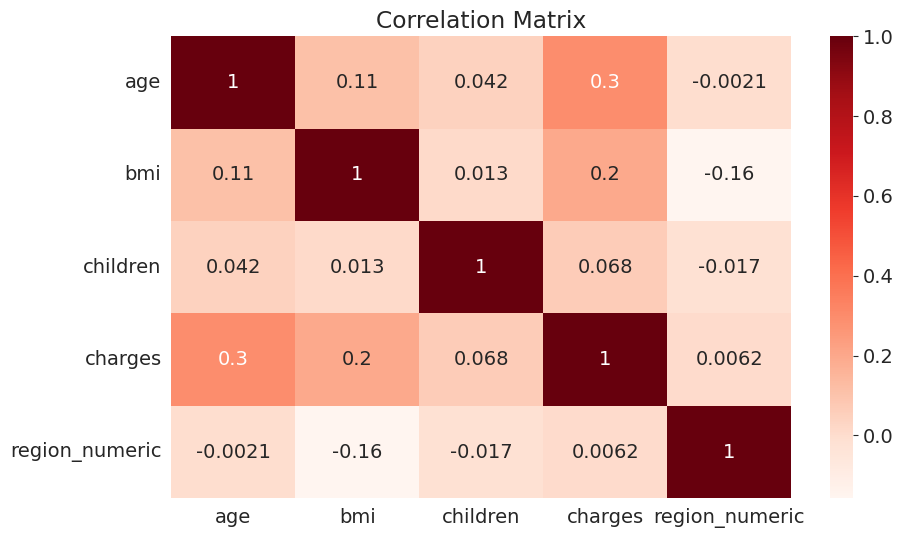

In [ ]:
sns.heatmap(medical_df.select_dtypes(include=np.number).corr(), cmap="Reds", annot=True)
plt.title('Correlation Matrix');

### **Linear Regression Using a Single Feature**

##### **We now know that "smoker", "age" and "region" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First let's create a dataframe containing just the data for non-smokers.**

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

### **Now let's visualize the relationship between "age" and "charges"**

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

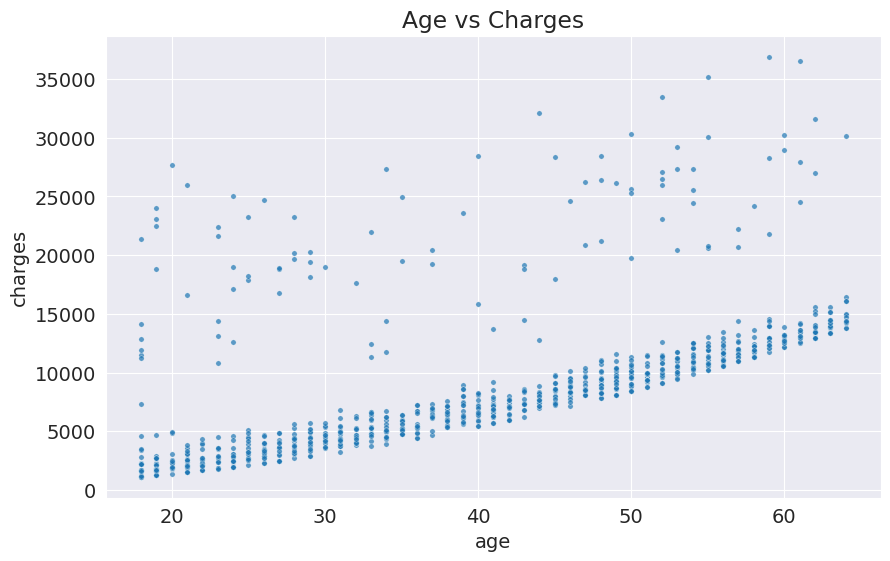

In [ ]:
plt.title("Age vs Charges")
sns.scatterplot(data = non_smoker_df, x = "age", y = "charges", alpha = 0.7, s = 15)

### **Apart from a few exceptions, the points seem to form a line. We will try and "fit" a line using this points, and use the line to predict charges for a given age. A line of A & Y cordinates has the following formula:**

###### **y = wx + b**

### **The line is characterized by two numbers: w (called "slope") and b (called "intercept").**

## **Model**

### **In the above case, the x axis shows "age" and the y axis shows "charges". Thus we assume the following relationship btw the two:**

##### **charges = w x age + b  w = weight and b = bias**

### **We will try and determine w and b for the line that best fits the data.**

### **This technique is called linear regression, and we call the above equation "A Linear Regression Model", because it models the relationship btw "age" and "charges" as a straight line.**
### **The numbers w and b are called the parameters or weights of the model.**
### **The values in the "age" column of the dataset are called the "inputs" to the model and the values in the charges column are called the "target".**

### **Let's define a helper function "estimate_charges" to compute "charges", given age, w and b.**

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

### **The "estimate_charges" function is our very first model.**

### **Let's guess the values for w and b and use them to estimate the values for charges**

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


### **Now let's check actual "charges"**

In [ ]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


### **We can plot "estimated charges" using a line graph**

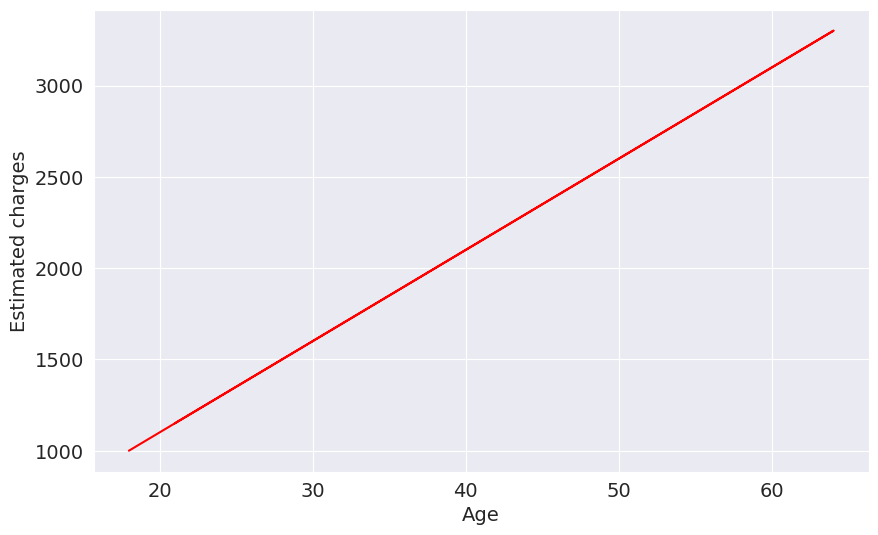

In [ ]:
plt.plot(ages, estimated_charges, color = "red");
plt.xlabel("Age");
plt.ylabel("Estimated charges");
plt.show()

### **So it is observed that "age" and "estimated charges" have linear relationship**

### **As expected, the points lie on a straight line.**
### **We can overlay this line on the actual data. So see how well our model fits the data.**

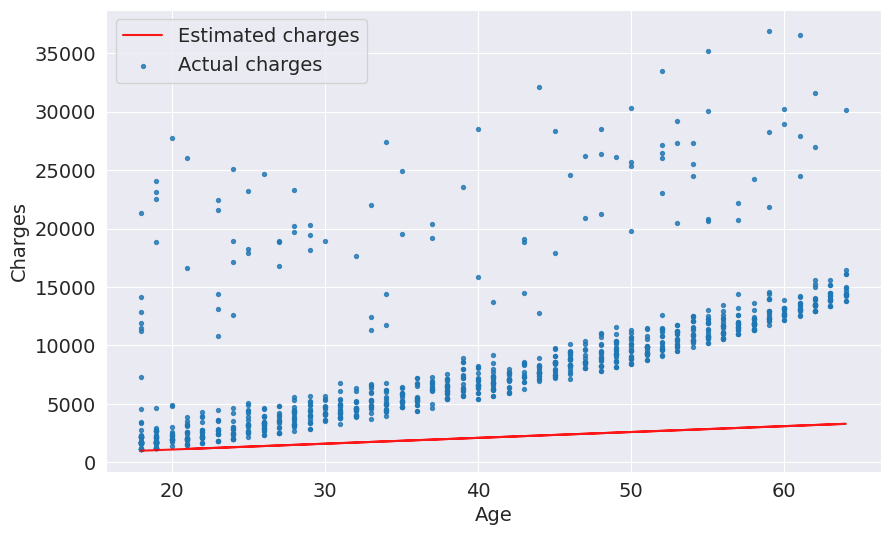

In [ ]:
target = non_smoker_df.charges ## Actual Data that we want to predict (Actual charges)

plt.plot(ages, estimated_charges, color = "red", alpha = 0.9);
plt.scatter(ages, target, s = 8, alpha = 0.8);
plt.xlabel("Age");
plt.ylabel("Charges")
plt.legend(["Estimated charges", "Actual charges"]);

### **Clearly our estimates are quite poor and the line does not "fit" the data. Let's improve it. We can try different values of w and b to move the line around. Let's define a helper function "try_parameters" which takes w and b as inputs and create the above plot.**

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, color = "red", alpha = 0.9);
  plt.scatter(ages, target, s = 8, alpha = 0.8);
  plt.xlabel("Age");
  plt.ylabel("Charges")
  plt.legend(["Estimated charges", "Actual charges"]);

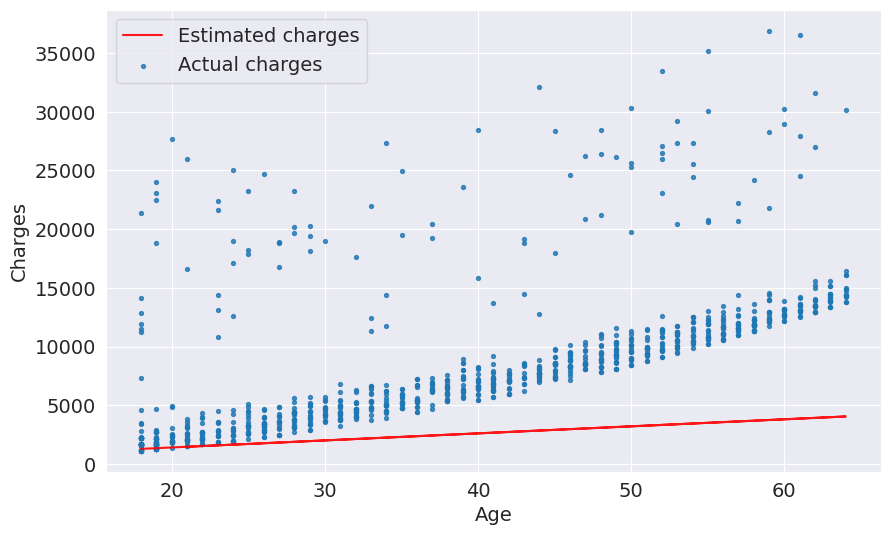

In [ ]:
try_parameters(60, 200)

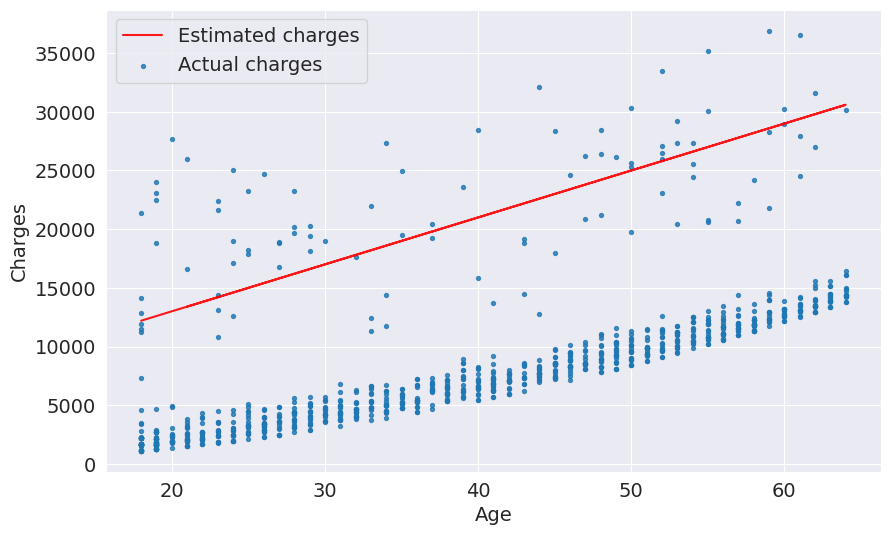

In [ ]:
try_parameters(400, 5000)

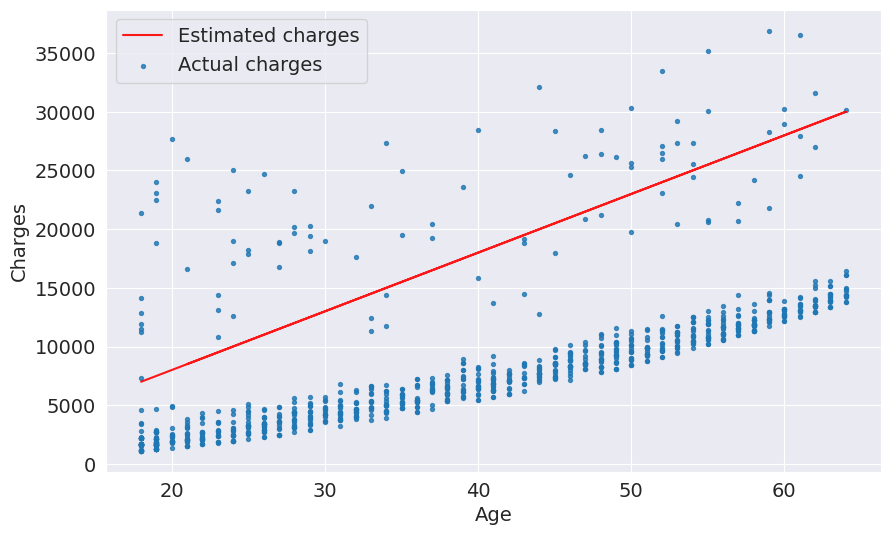

In [ ]:
try_parameters(500, -2000)

### **As we change the values, w and b manually, trying to move the line visually closer to the points, we are learning the approximate relationship btw "age" and "charges".**

### **Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship btw "age" and "charges"? To do this we need to solve a couple of problems:**
### **1. We need a way to measure numerically how well the line fits the points**
### **2. Once the "measure of fit" has been computed, we need a way to modify w and b to improve the fit of the line.**

### **If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.**

## **Loss/Cost Function**
### **We can compare our model's predictions with the targets using the following method:**

### **Calculate the difference btw the targets and the predictions (the differenced is called the "residual")**
### **Square all elements of the difference matrix to remove negative values.**
### **Calculate the average of the elements in the resulting matrix.**
### **Take the square root of the result.**

### **The result is a single number, known as the Root Mean Square Error (RMSE)**

### **i.e RMSE = (Predicted - Actual i.e target)**

In [ ]:
target = non_smoker_df.charges
target

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


### **Let's define a function to compute the RMSE**

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

### **Let's compute RMSE for our model with a sample set of weights**

In [ ]:
w = 50
b = 100

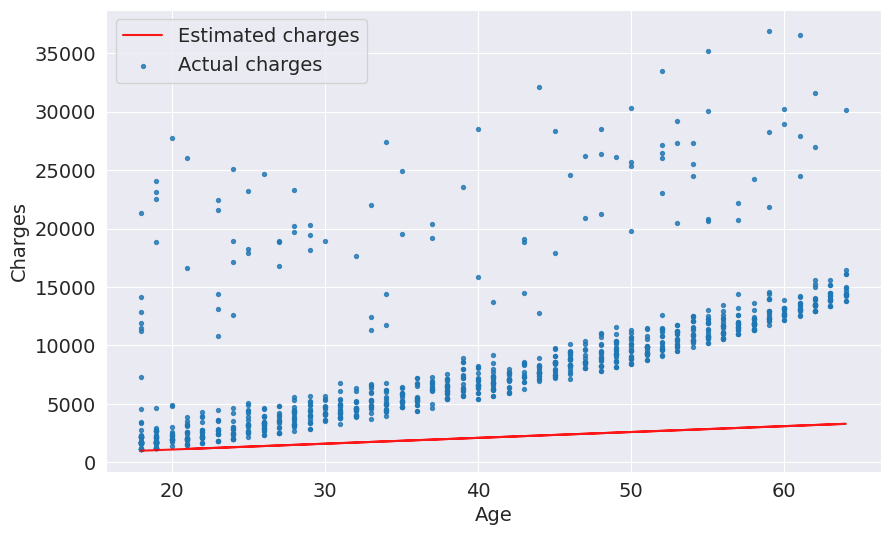

In [ ]:
try_parameters(w, b)

In [ ]:
target = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(target, predictions)

np.float64(8461.949562575493)

### **Here is how we can interpret the above number. On average, each element in the prediction differs from the actual target by $8461.**

### **The result is called the "loss" because it indcates how bad the model is at predicting the target variables. It represnts information loss in the model: the lower the loss, the better the model.**

### **Let's modify the "try_parameters" functions to also display the loss.**

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, color = "red", alpha = 0.9);
  plt.scatter(ages, target, s = 8, alpha = 0.8);
  plt.xlabel("Age");
  plt.ylabel("Charges")
  plt.legend(["Estimated charges", "Actual charges"]);

  loss = rmse(target, predictions)
  print("RMSE loss: ", loss)


RMSE loss:  8461.949562575493


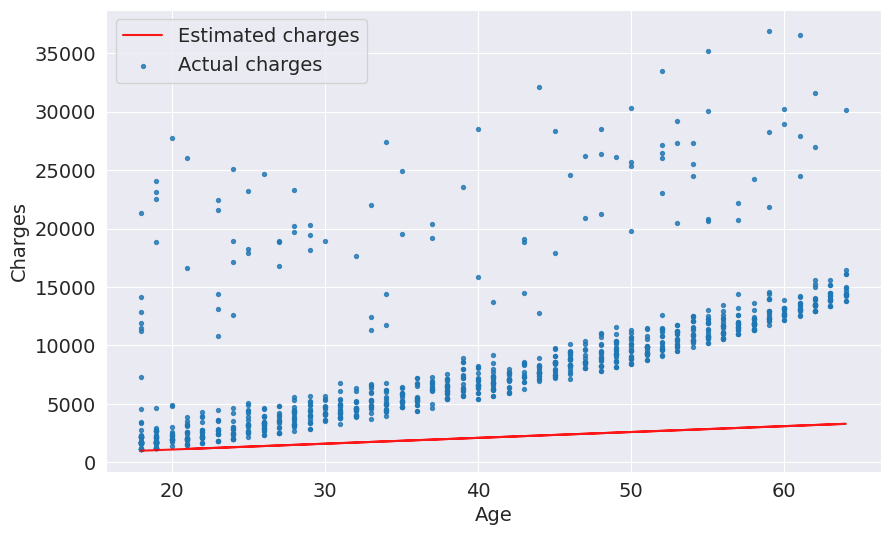

In [ ]:
try_parameters(50, 100)

RMSE loss:  4991.993804156943


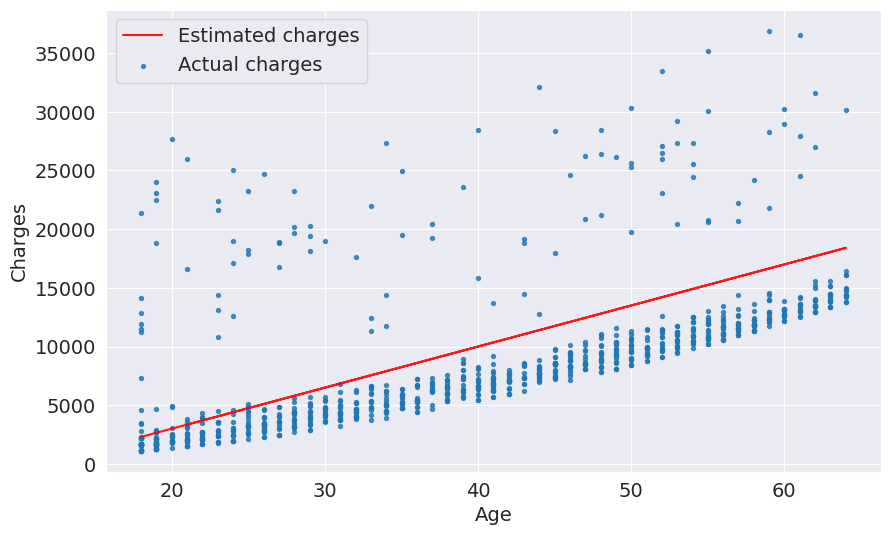

In [ ]:
try_parameters(350, -4000)

### **So 350 and -4000 is the best guess to fix the error. As RMSE decreases, the line moves closer to the points. i.e To "fit" the line to the data. This is how we can reduce the error.**

### **Try different values of w (weights) and b (bias) to minimize the RMSE loss. What is the lowest value of loss you are able to achieve? Can you come with a general strategy to finding better values of w and b by trial and error.**

#### **Optimizer**

### **Next, we need a strategy to modify weights w and b (bias) to reduce the loss and improve the "fit" of the line to the data.**

### **1. Ordinary Least Squares-better for smaller datasets.**
### **2. Stochastic Gradient Descent-better for larger datasets**

### **Both of these have the same objective: to minimize the loss.**

### **Linear Regression using Scikit-learn**

### **Let's use the LinearRegression class from scikit learn to find the best fit line for "age" and "charges" using Ordinaryb Least Squares optimization technique.**

In [ ]:
from sklearn.linear_model import LinearRegression

### **First we create a new model object**

In [ ]:
model = LinearRegression()

### **Next, we can use the "fit" method of the model to find the best fit line for the inputs and the targets.**

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



## **Now that the input x must be a 2-d array, so we will need to pass a dataframe, instead of a single column.**

In [ ]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df["charges"]
print("inputs.shape: ", inputs.shape)
print("targets.shape:", targets.shape)

inputs.shape:  (1064, 1)
targets.shape: (1064,)


### **Let's fit the model to the data**

In [ ]:
model.fit(inputs, targets)

LinearRegression()

### **Now we can make predictions using the model. Let's try predicting the charges for ages 23, 37 and 61.**

In [ ]:
model.predict(np.array(([[23],
                       [37],
                       [61]])))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

### **Do these values seem reasonable? Compare them with the scatter plot above.**

### **Let's compute the predictions for the entire set of inputs.**

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

### **Let's compare with the targets (Actual) charges**

In [ ]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


### **Let's compute the RMSE loss to evaluate the model. i.e RMSE = target - predictions**

In [ ]:
rmse(targets, predictions)

np.float64(4662.505766636395)

### **Seems like our prediction is off by $4000 on average, which is not too bad, considering the fact that there are several outliers.**

### **The parameters of the model are stored in the coef_ and intercept_ properties.**

In [ ]:
# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

np.float64(-2091.4205565650864)

### **Are these parameters close to your best guesses?**

### **Let's visualize the line created by the above parameters**

RMSE loss:  4662.505766636395


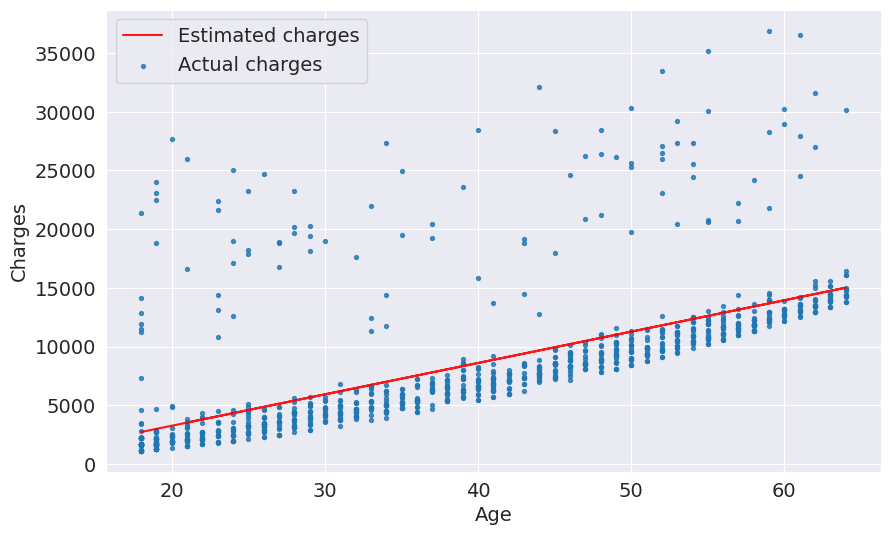

In [ ]:
try_parameters(model.coef_, model.intercept_)

### **Exercise: Use SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Bo you see any difference in the result?**

### **Exercise 2: Repeat the steps in this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.**

### **Every machine learning problem has 3 components:**
### **1.Model**
### **2.Cost Function**
### **3.Optimizer**
### **The lower the cost function the better the model.**

### **As we have seen above, it takes just a few lines of code to train a machine learning model using scikit-learn**

In [ ]:
# Create inputs(2-d array) and targets(1-d arrays)
inputs, targets = non_smoker_df[["age"]], non_smoker_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)



loss: 4662.505766636395


### **Linear Regression using Multiple Features**

### **We have used "age" to estimate "charges". We want to add another features like "bmi" to assume the the following relationship:**

### charges = w1 * age + w2 * bmi + b

In [ ]:
# Create inputs(2-d array) and targets(1-d arrays)
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)

loss: 4662.3128354612945


### charges = w1 * age + w2 * bmi + w3 * children + b

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [ ]:
# Create inputs(2-d array) and targets(1-d arrays)
inputs, targets = non_smoker_df[["age", "bmi", "children"]], non_smoker_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)

loss: 4608.470405038247


### **Using the entire dataset (medical_df contains both smokers & non_smokers)to see if the line can fit the data**

In [ ]:
# Create inputs(2-d array) and targets(1-d arrays)
inputs, targets = medical_df[["age", "bmi", "children"]], medical_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)

loss: 11355.317901125973


### **Using Categorical Columns for Machine Learning**

### **If a categorical column has just 2 categories (It is called a binary category). Then we can replace their values with 0 & 1**
### **If a categorical column has more than 2 categories, we can perform one-hot encoding i.e create a new column for each category with 1s & 0s**
### **If a categorical column has a natural order (e.g cold, neutral, warm hot), then they can be converted to numbers (1,2,3,4), preserving the order. These are called ordinals**

## **Binary Category**

### **The "smoker" category has just 2 values, "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes"**

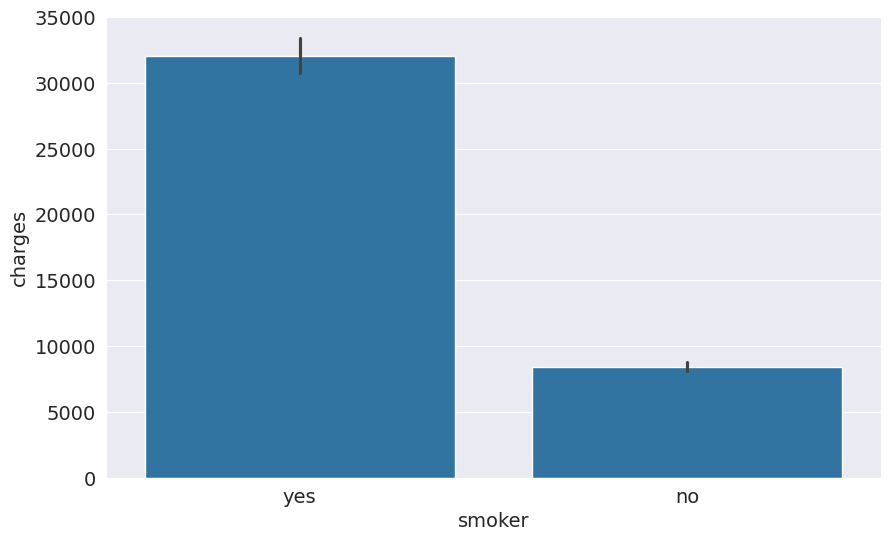

In [ ]:
sns.barplot(data = medical_df, x = "smoker", y = "charges");

In [ ]:
smoker_codes = {"no" : 0, "yes" : 1}
medical_df["smoker_code"] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,region_numeric,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,2,0
2,28,male,33.000,3,no,southeast,4449.46200,2,0
3,33,male,22.705,0,no,northwest,21984.47061,3,0
4,32,male,28.880,0,no,northwest,3866.85520,3,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3,0
1334,18,female,31.920,0,no,northeast,2205.98080,4,0
1335,18,female,36.850,0,no,southeast,1629.83350,2,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

### **We can now use smoker_code column for linear regression**

### charges = w1 * age + w2 * bmi + w3 * children + w4 * smoker + b

In [ ]:
# Create inputs(2-d array) and targets(1-d arrays)
inputs, targets = medical_df[["age", "bmi", "children", "smoker_code"]], medical_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)

loss: 6056.439217188081


### **Now let's add sex column**

### charges = w1 * age + w2 * bmi + w3 * children + w4 * smoker + w5 * sex + b

<Axes: xlabel='sex', ylabel='charges'>

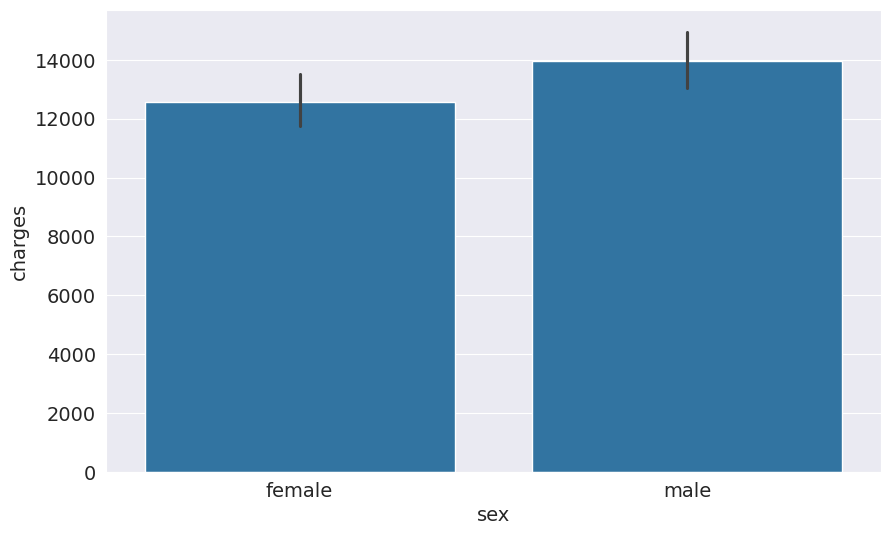

In [ ]:
sns.barplot(data = medical_df, x = "sex", y = "charges")

In [ ]:
sex_codes = {"female" : 0, "male" : 1}

In [ ]:
medical_df["sex_code"] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,region_numeric,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,2,0,1
2,28,male,33.000,3,no,southeast,4449.46200,2,0,1
3,33,male,22.705,0,no,northwest,21984.47061,3,0,1
4,32,male,28.880,0,no,northwest,3866.85520,3,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,4,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,2,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,0


In [ ]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

### **This has a very low correlation**

### **The "region" column contains 4 values. We will need to use one-hot encoding and create new column for each region**

<Axes: xlabel='region', ylabel='charges'>

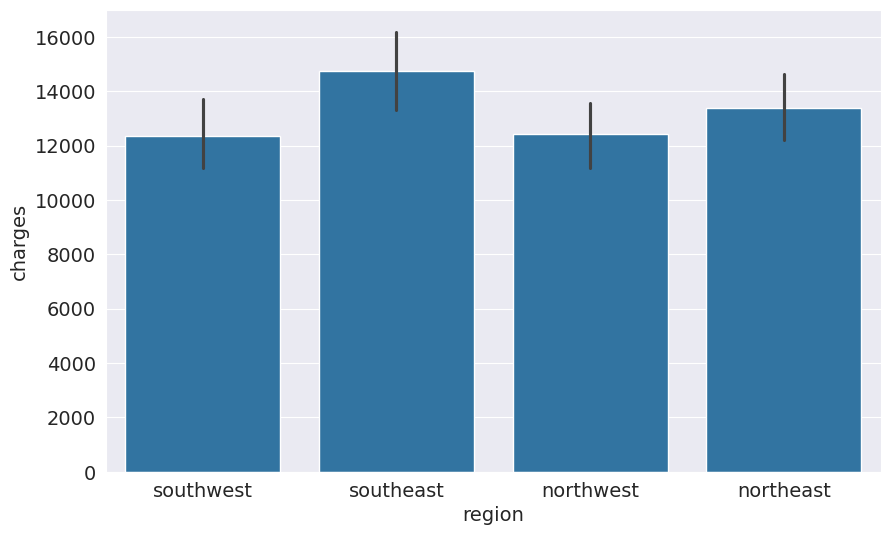

In [ ]:
sns.barplot(data = medical_df, x = "region", y = "charges")

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,region_numeric,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,2,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,2,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,3,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,3,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,4,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,2,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,0,0.0,0.0,0.0,1.0


### **Let's include the "region" column into our Linear Regression model**

### charges = w1 * age + w2 * bmi + w3 * children + w4 * smoker + w5 * sex + w6 * northeast + w7 * northwest + w8 * southeast + w9 * southwest

In [ ]:
# Create inputs(2-d array) and targets(1-d arrays)
inputs, targets = medical_df[["age", "bmi", "children", "smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]], medical_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)

loss: 6041.6796511744515


In [ ]:
input_cols = ["age", "bmi", "children", "smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]  # Define input_cols
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [ ]:
model.predict([[28, 30, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

### **Model Improvement**

### **Feature Scaling:**

### **To compare the importance of each feature in the model, our first instinct might be to compare their weights.**

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

np.float64(-12525.547811195444)

In [ ]:
weight_df = pd.DataFrame({
    "feature":np.append(input_cols, 1),
    "weight": np.append(model.coef_, model.intercept_)
})

weight_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


### **While it seems like BMI and "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited to (15 - 40) and the "northeast" column only takes the values of 0 and 1.**

### **We are going to carry out Standardization of the independent variables:**
### **i.e we are going to scale the numerical columns using "StandardScaler", and we are going to use one-hot encoding for categorical columns.**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

### **Now we scale the data**

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

### **Let's now combine with categorical data**

In [ ]:
cat_cols = ["smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]
categorical_data = medical_df[cat_cols]

### **Then we train the model**

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges

In [ ]:
# create and train the model
model = LinearRegression().fit(inputs, targets)

In [ ]:
# Generate predictions
predictions = model.predict(inputs)

In [ ]:
# compute loss to evaluate the model
loss = rmse(targets, predictions)
print("loss:", loss)

loss: 6041.6796511744515


### **We can now compare the weights in the formula:**
### charges = w1 * age + w2 * bmi + w3 * children + w4 * smoker + w5 * sex + w6 * region + b

In [ ]:
weight_df = pd.DataFrame({
    "feature":np.append(numeric_cols + cat_cols, 1),
    "weight": np.append(model.coef_, model.intercept_)
})
weight_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


### **As we can see now, the most important features are:**
### **Smoker**
### **Age**
### **BMI**

### **In our model, smoker added 23848 weight, age (3607), bmi (2067), children (572) to our calculations.**

In [ ]:
scaler.transform([[28, 30, 2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]])

array([29875.81463371])

## **How to Approach a Machine Learning Problem:**
#### **Explore the data and find correlation btw inputs and targets**
#### **Pick the right model, loss function and optimizer for the problem at hand**
#### **Scale numeric variables and one-hot encode categorical data**
#### **Set aside a test set (using a fraction of the training set)**
#### **Train the model**
#### **Make predictions on the test set and compute the loss**


## **Creating a Test Set**
#### **This is the practice of setting aside 10% of the data, just for testing and reporting the result of the model.**

In [ ]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.1)

# create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# compute loss to evaluate the model
loss = rmse(targets_test, predictions_test)
print("Test_Loss:", loss)

Test_Loss: 5996.497655015918


In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# compute loss to evaluate the model
loss = rmse(targets_train, predictions_train)
print("Training_Loss:", loss)

Training_Loss: 6049.458230014655
